In [1]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
from util.util import get_cancer, binary_symmetric_channel

%matplotlib notebook
%reload_ext autoreload
%autoreload 2

# Decision Theory

In [2]:
C0, C1 = get_cancer()

<IPython.core.display.Javascript object>


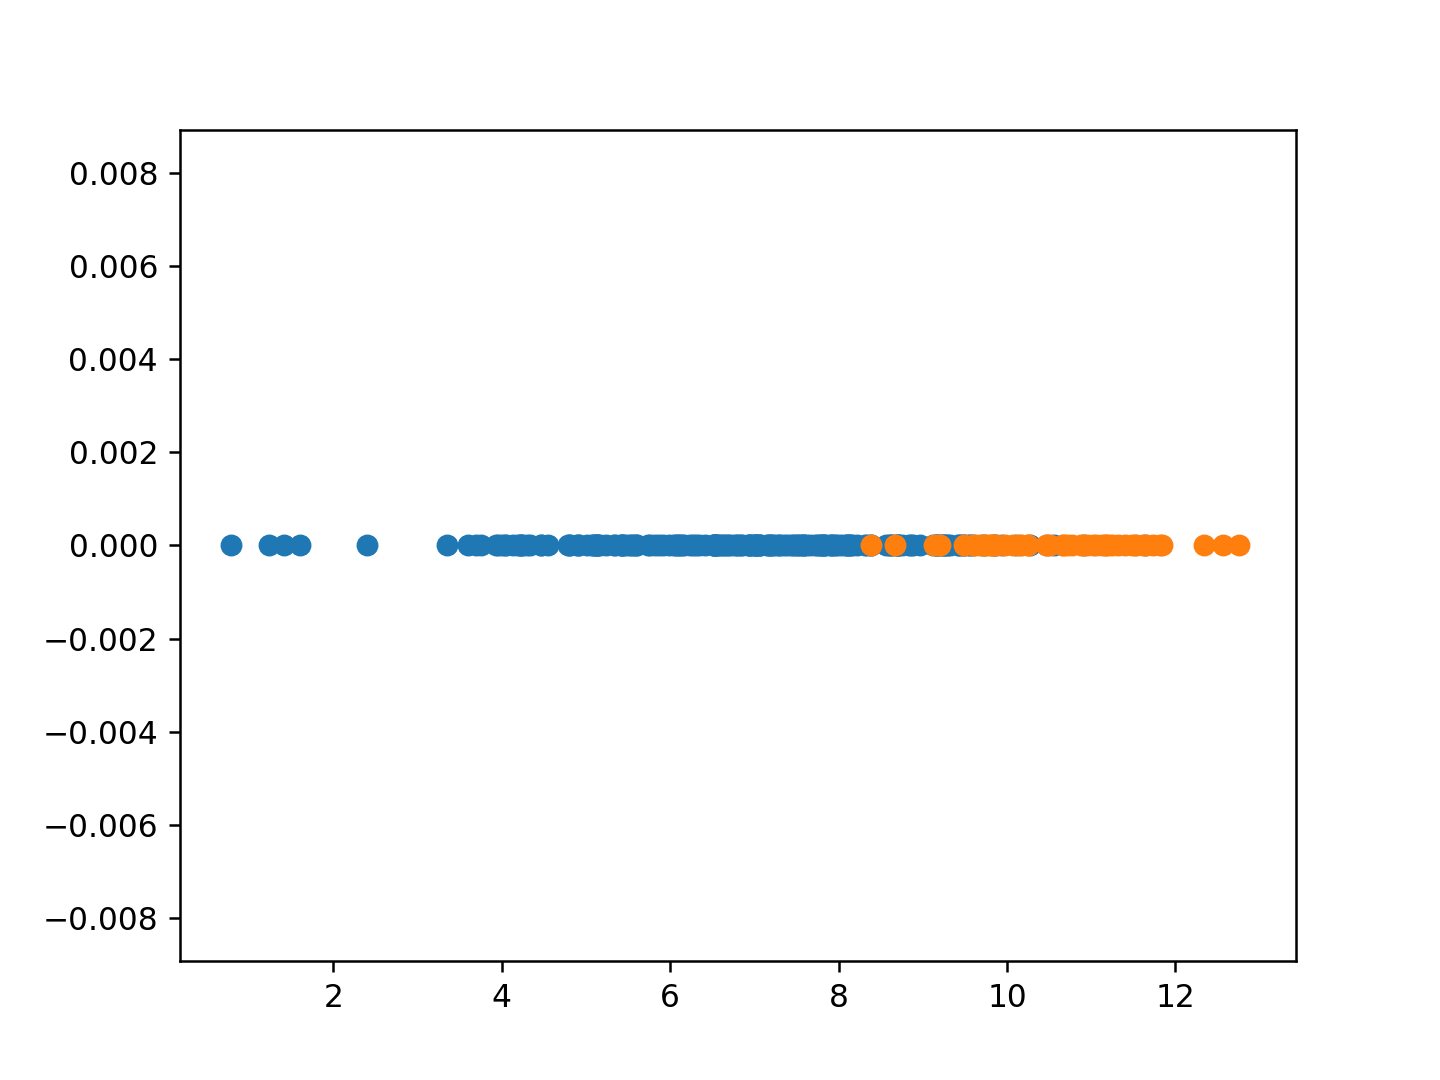

In [3]:

plt.figure()
plt.scatter(C0, np.zeros(len(C0)))
plt.scatter(C1, np.zeros(len(C1)))
plt.show()

In [4]:
p_C0 = len(C0)/(len(C0)+len(C1))
p_C1 = len(C1)/(len(C0)+len(C1))

In [5]:
p_x_C0 = lambda x: norm.pdf(x, loc=np.mean(C0), scale=np.std(C0))
p_x_C1 = lambda x: norm.pdf(x, loc=np.mean(C1), scale=np.std(C1))

In [6]:
p_x= lambda x: p_x_C0(x)*p_C0+p_x_C1(x)*p_C1

In [7]:
p_C0_x = lambda x: p_x_C0(x)*p_C0/p_x(x)
p_C1_x = lambda x: p_x_C1(x)*p_C1/p_x(x)

In [8]:
x = np.arange(0,20.1,0.1)

<IPython.core.display.Javascript object>


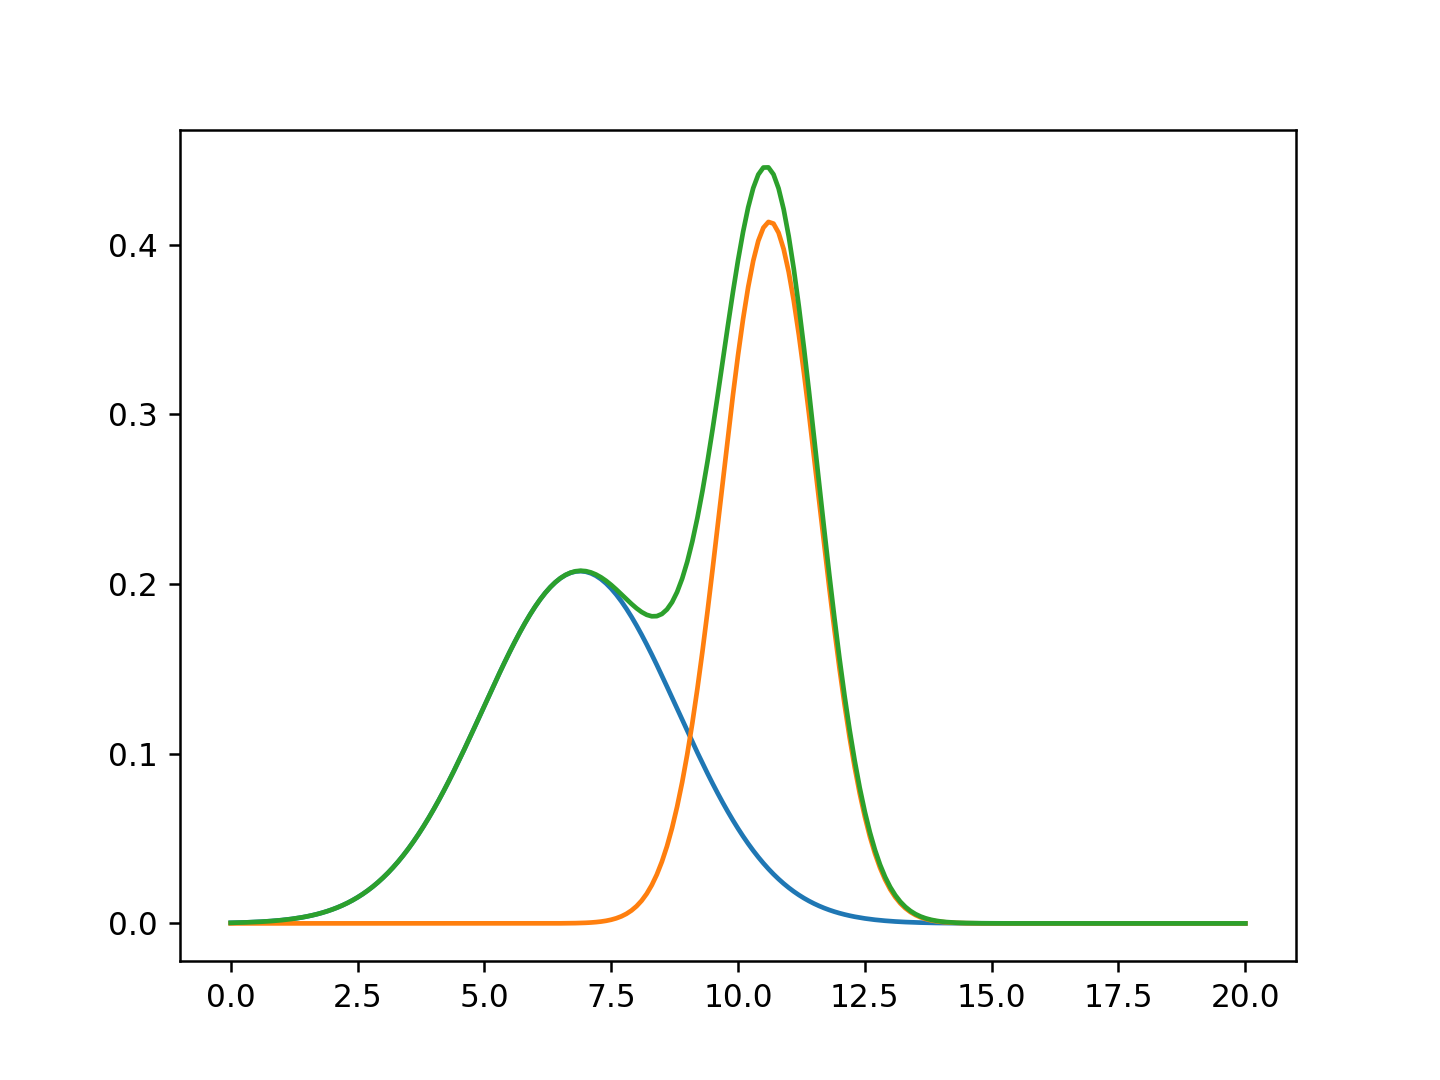

In [9]:
plt.figure()
plt.plot(x,p_x_C0(x)) 
plt.plot(x,p_x_C1(x)) 
plt.plot(x,(p_x_C0(x)+p_x_C1(x)))
plt.show()

<IPython.core.display.Javascript object>


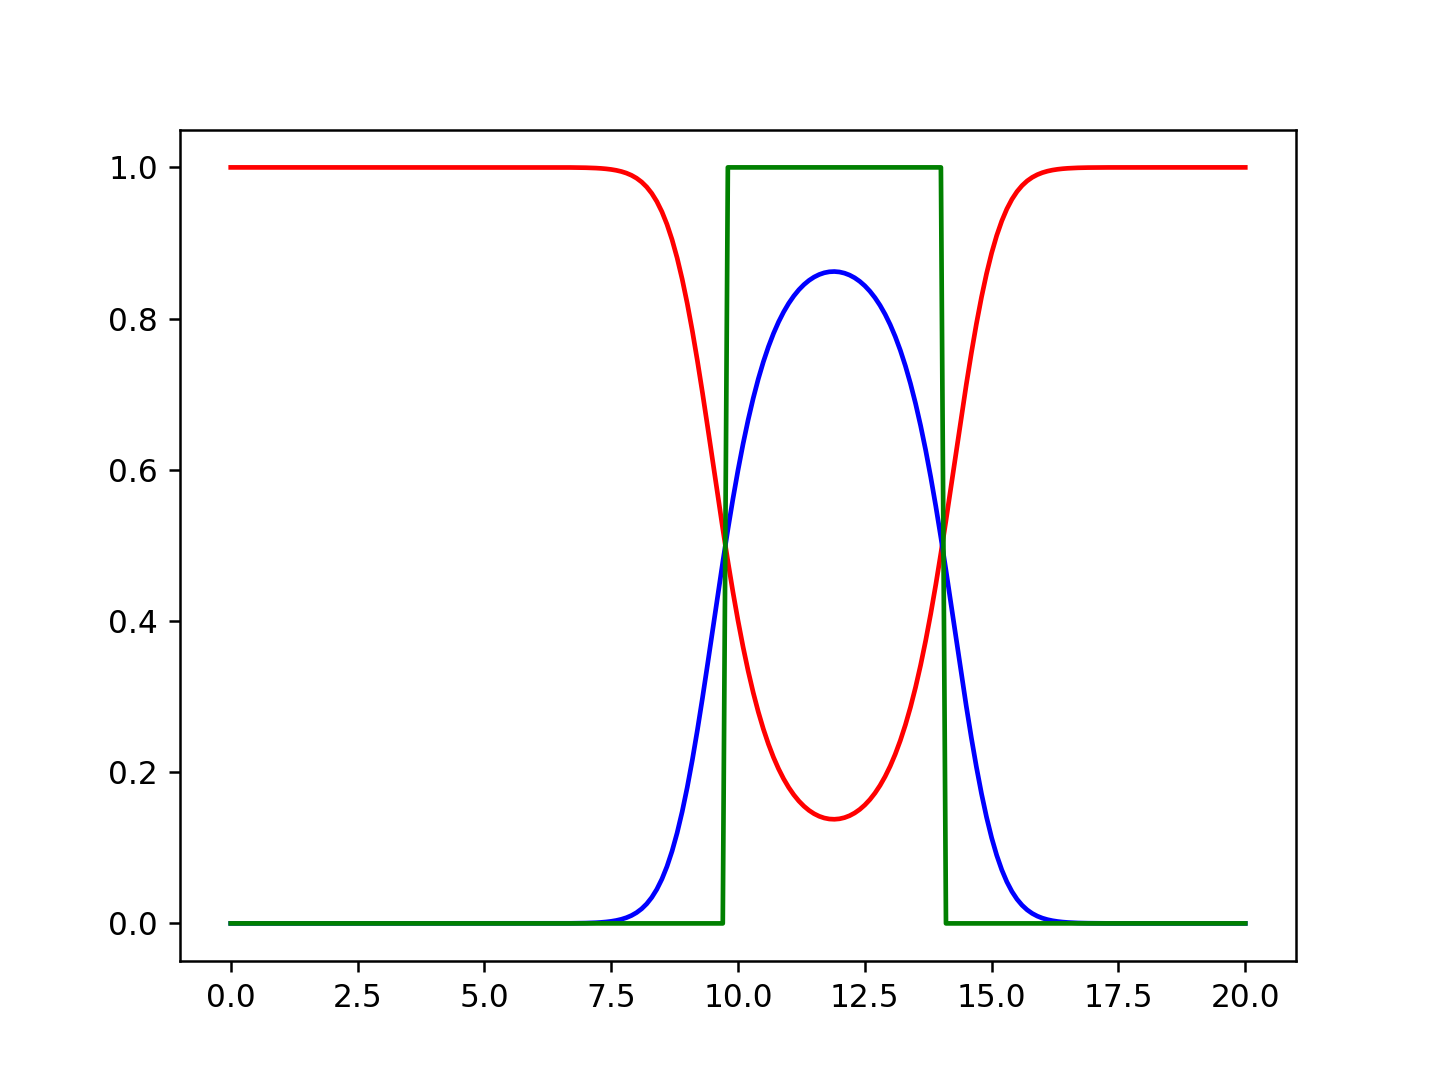

In [10]:

plt.figure()
plt.plot(x,p_C0_x(x),'r-') 
plt.plot(x,p_C1_x(x),'b-') 
plt.plot(x,(1-np.sign(p_C0_x(x)-p_C1_x(x)))/2,'g-')  
plt.show()

In [11]:
loss=np.array([[0,1],[100,0]])

In [14]:
l_c0 = lambda x : (p_C0_x(x) * loss[0, 0] + p_C1_x(x) * loss[1, 0])*p_x(x)
l_c1 = lambda x : (p_C0_x(x) * loss[0, 1] + p_C1_x(x) * loss[1, 1])*p_x(x)

<IPython.core.display.Javascript object>


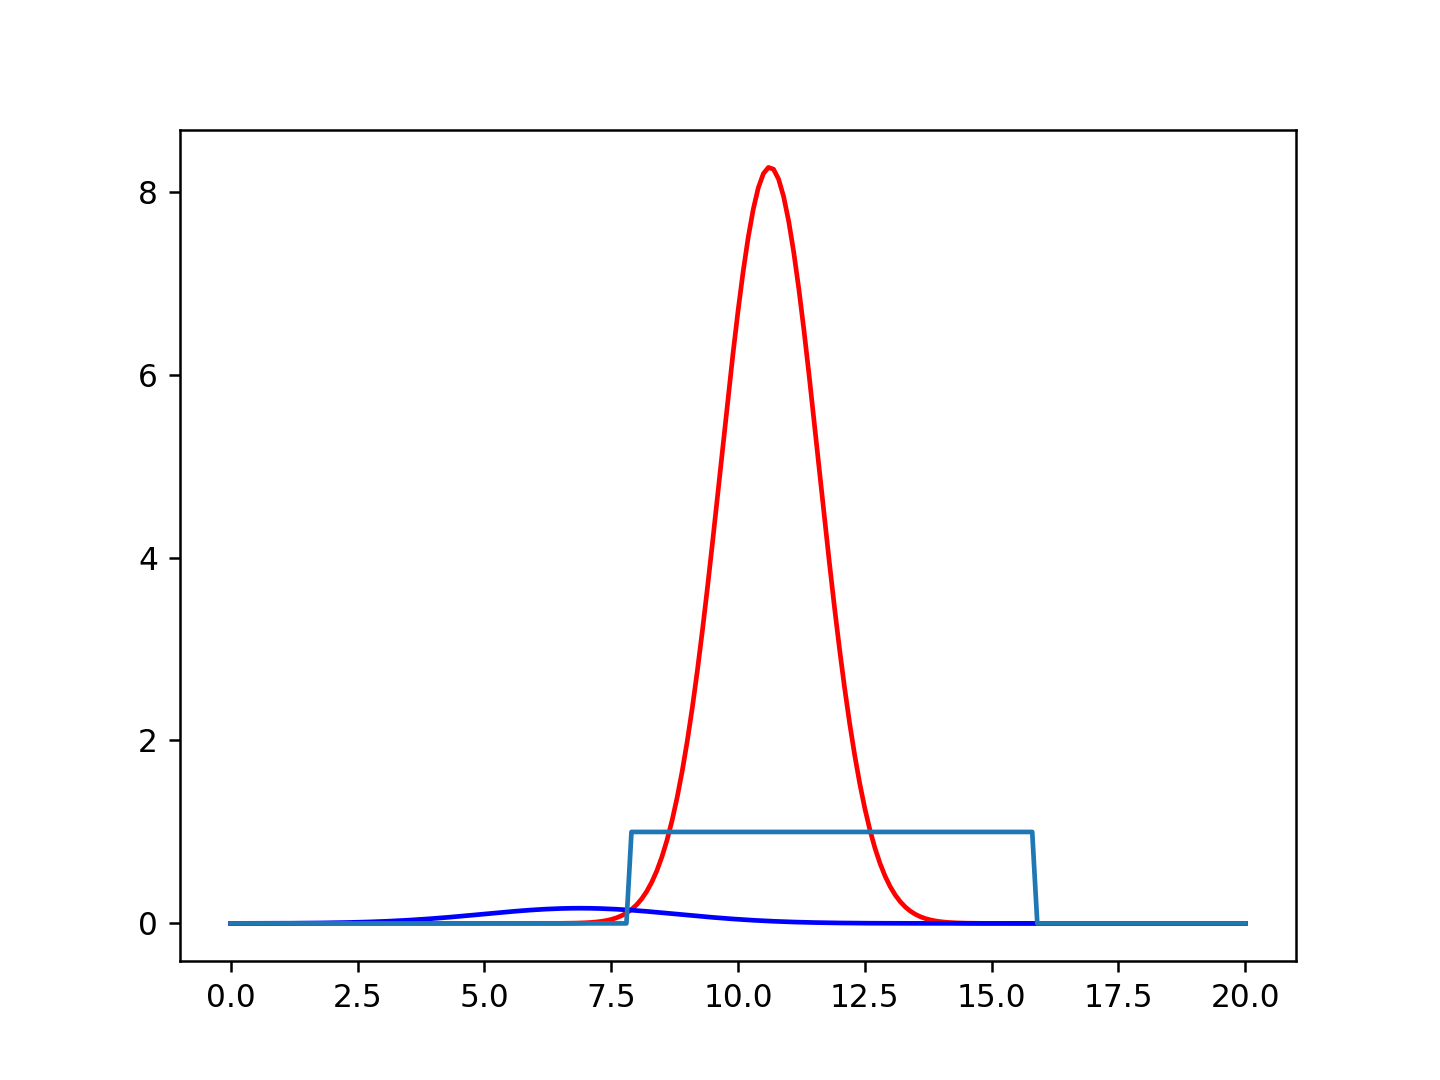

In [15]:
plt.figure()

plt.plot(x,l_c0(x), c='r')
plt.plot(x,l_c1(x), c='b')

plt.show()

In [16]:
decision = lambda x : np.argmin([l_c0(x),l_c1(x)],axis=0)

In [17]:
plt.plot(x,decision(x))
plt.show()